In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
df= pd.read_csv('UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [14]:

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [5]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [8]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
print(df['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


In [10]:
print(df["Category"].unique())


['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [11]:
from sklearn.model_selection import train_test_split
# 1. Drop exact duplicates first
df = df.drop_duplicates(subset=["Resume", "Category"]).reset_index(drop=True)

# 2. Then split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df["Resume"], df["Category"], test_size=0.2, random_state=42, stratify=df["Category"]
    
)

# 3. Check for overlap BEFORE preprocessing
overlap = set(X_train) & set(X_test)
print("Number of overlapping samples between train and test:", len(overlap))
print("Exact duplicates (resume + label):", df.duplicated(subset=["Resume", "Category"]).sum())
print("Duplicates only in resume:", df.duplicated(subset=["Resume"]).sum())




Number of overlapping samples between train and test: 0
Exact duplicates (resume + label): 0
Duplicates only in resume: 0


In [12]:
def preprocess_text(text):
    text=re.sub(r'<*?>','',text )# Remove HTML tags
    text=text.lower()  # Convert to lowercase
    text=re.sub(r'[^a-z\s]','',text)  # Remove non
    tokens= word_tokenize(text)  # Tokenize text
    tokens=[word for word in tokens if word not in stop_words]  # Remove stop
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [15]:
X_train_clean = X_train.apply(preprocess_text)
X_test_clean = X_test.apply(preprocess_text)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [22]:
from sklearn.svm import LinearSVC
import joblib

model = LinearSVC()
model.fit(X_train_vec, y_train)
joblib.dump(model, "model.pkl")


['model.pkl']

In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

y_train_pred = model.predict(X_train_vec)
y_test_pred = model.predict(X_test_vec)

# 4. Accuracy (no encoding needed here)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# 5. Encode labels (only for MSE)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_pred_encoded = label_encoder.transform(y_train_pred)
y_test_pred_encoded = label_encoder.transform(y_test_pred)

# 6. MSE
print("Train MSE:", mean_squared_error(y_train_encoded, y_train_pred_encoded))
print("Test MSE:", mean_squared_error(y_test_encoded, y_test_pred_encoded))


Train Accuracy: 1.0
Test Accuracy: 0.8235294117647058
Train MSE: 0.0
Test MSE: 26.705882352941178


/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         1
       Automation Testing       0.50      1.00      0.67         1
               Blockchain       1.00      1.00      1.00         1
         Business Analyst       0.50      1.00      0.67         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       1.00      1.00      1.00         2
                 Database       1.00      1.00      1.00         2
          DevOps Engineer       0.00      0.00      0.00         1
         DotNet Developer       1.00      1.00      1.00         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       1.00      1.00      1.00         1
                       HR       1.00      1.00      1.00         2
                   Hadoop       1.00      1.00      1.00     

/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/home/abdullah/Desktop/emailspam/venv/lib/pyt

/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/abdullah/Desktop/emailspam/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


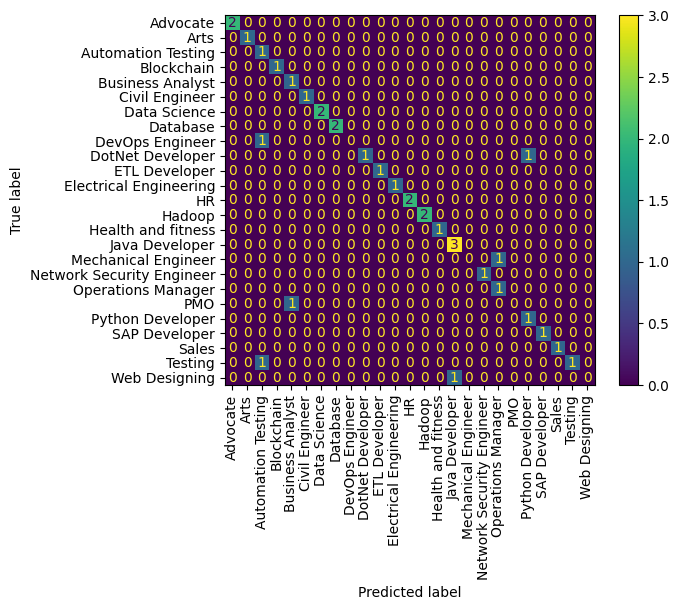

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90)

In [20]:
new_resume = """
Experienced Data Scientist with 3+ years of experience in building predictive models and performing data analysis using Python, R, and SQL. 
Skilled in machine learning, deep learning, data visualization, and statistical analysis. 
Worked on projects involving NLP, time series forecasting, and computer vision. 
Proficient in libraries like pandas, scikit-learn, TensorFlow, and matplotlib.
"""
new_resume_clean = preprocess_text(new_resume)
new_resume_vec = vectorizer.transform([new_resume_clean])
predicted_category = model.predict(new_resume_vec)
print("Predicted Category for New Resume:", predicted_category[0])


Predicted Category for New Resume: Data Science


In [21]:
resume_1 = """
Experienced Data Scientist with expertise in machine learning, data mining, and statistical modeling. 
Proficient in Python, pandas, scikit-learn, and SQL. Built predictive models for customer churn, sales forecasting, and NLP tasks. 
Strong background in deep learning and data visualization.
"""
resume_2 = """
Java Developer with 4 years of experience building scalable enterprise applications using Spring Boot, Hibernate, and RESTful APIs. 
Strong understanding of object-oriented design, multithreading, and database integration (MySQL, MongoDB). 
Worked on microservices and agile-based projects.
"""
resume_3 = """
Certified DevOps Engineer with hands-on experience in CI/CD pipelines, Docker, Kubernetes, Jenkins, and AWS. 
Implemented automated deployment pipelines, infrastructure as code with Terraform, and monitored systems using Prometheus and Grafana.
"""
resume_4 = """
Creative Web Designer with 3 years of experience in UI/UX design, responsive web layouts, and front-end development. 
Skilled in HTML, CSS, JavaScript, and tools like Figma and Adobe XD. Designed user-friendly interfaces and collaborated closely with developers.
"""
resume_5 = """
Human Resource professional with strong experience in recruitment, onboarding, employee relations, and HRIS systems. 
Skilled in conducting interviews, policy implementation, and managing payroll and performance appraisals. 
Familiar with labor laws and workplace compliance.
"""
resumes = [resume_1, resume_2, resume_3, resume_4, resume_5]

for i, r in enumerate(resumes, 1):
    cleaned = preprocess_text(r)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    print(f"Resume {i} predicted category: {pred}")


Resume 1 predicted category: Data Science
Resume 2 predicted category: Java Developer
Resume 3 predicted category: DevOps Engineer
Resume 4 predicted category: Web Designing
Resume 5 predicted category: HR
